In [1]:
!pip -q install datasets python-docx sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.4 MB/s eta 0:00:00


# TextBox framework

Установки зависимойстей сборки фреймворка

In [2]:
!apt-get install libffi-dev
!apt-get install libcairo2-dev gcc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libffi-dev
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 63.7 kB of archives.
After this operation, 336 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libffi-dev amd64 3.4.2-4 [63.7 kB]
Fetched 63.7 kB in 3s (19.5 kB/s)
Selecting previously unselected package libffi-dev:amd64.
(Reading database ... 121658 files and directories currently installed.)
Preparing to unpack .../libffi-dev_3.4.2-4_amd64.deb ...
Unpacking libffi-dev:amd64 (3.4.2-4) ...
Setting up libffi-dev:amd64 (3.4.2-4) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gcc is already the newest version (4:11.2.0-1ubuntu1).
gcc set to manually installed.
The following additional packages will be installed:
 

In [3]:
!git clone https://github.com/RUCAIBox/TextBox.git

Cloning into 'TextBox'...
remote: Enumerating objects: 11190, done.
remote: Counting objects: 100% (2598/2598), done.
remote: Compressing objects: 100% (1004/1004), done.
remote: Total 11190 (delta 1528), reused 2501 (delta 1518), pack-reused 8592
Receiving objects: 100% (11190/11190), 130.07 MiB | 30.67 MiB/s, done.
Resolving deltas: 100% (6927/6927), done.
Updating files: 100% (294/294), done.


Установка библиотеки `files2rouge` для подсчета метрики

In [4]:
!git clone https://github.com/pltrdy/files2rouge.git
%cd files2rouge
!python setup_rouge.py
!python setup.py install
%cd ..

Cloning into 'files2rouge'...
remote: Enumerating objects: 278, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 278 (delta 9), reused 11 (delta 6), pack-reused 258
Receiving objects: 100% (278/278), 212.16 KiB | 1.48 MiB/s, done.
Resolving deltas: 100% (133/133), done.
/content/files2rouge
Traceback (most recent call last):
  File "/content/files2rouge/setup_rouge.py", line 10, in <module>
    from files2rouge import settings
  File "/content/files2rouge/files2rouge/__init__.py", line 2, in <module>
    from files2rouge.files2rouge import run
  File "/content/files2rouge/files2rouge/files2rouge.py", line 20, in <module>
    import pyrouge
ModuleNotFoundError: No module named 'pyrouge'
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ****************************************************************************

Используем версию вреймворка `0.2.1`

In [5]:
%cd TextBox
!git checkout 0.2.1
!pip install -e . -q

/content/TextBox
Branch '0.2.1' set up to track remote branch '0.2.1' from 'origin'.
Switched to a new branch '0.2.1'
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.7 MB/s eta 0:00:00


Доустанавливаем пропущенные зависимости. Которых почему-то нет в `requests.txt`

In [6]:
!pip install -q bert_score pyrouge pycocoevalcap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 MB 8.6 MB/s eta 0:00:00


Скачиваем предобученные веса для задачи генерации текста на основе датасета COCO

In [7]:
!mkdir saved
!wget -O "./saved/LeakGAN-COCO-Jan-20-2024_10-23-50.pth" https://drive.google.com/file/d/12yejLKKclH-AJQAt7uvR7IaihKGAX_oA/view?usp=sharing

--2024-01-21 09:24:32--  https://drive.google.com/file/d/12yejLKKclH-AJQAt7uvR7IaihKGAX_oA/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 142.251.2.113, 142.251.2.101, 142.251.2.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘./saved/LeakGAN-COCO-Jan-20-2024_10-23-50.pth’

./saved/LeakGAN-COC     [ <=>                ]  82.65K  --.-KB/s    in 0.004s  

2024-01-21 09:24:33 (19.6 MB/s) - ‘./saved/LeakGAN-COCO-Jan-20-2024_10-23-50.pth’ saved [84636]



Входные параметры точки входа фреймворка

In [8]:
!python run_textbox.py -h

usage: run_textbox.py [-h] [--model MODEL] [--dataset DATASET] [--config_files CONFIG_FILES]

options:
  -h, --help            show this help message and exit
  --model MODEL, -m MODEL
                        name of models
  --dataset DATASET, -d DATASET
                        name of datasets
  --config_files CONFIG_FILES
                        config files


Настраиваем конфигурацию фреймворка под нашу задачу

In [9]:
import yaml

data = {
  "epochs": 2,
  "g_pretraining_epochs": 2,
  "d_pretraining_epochs": 2,
  "load_experiment": "./saved/LeakGAN-COCO-Jan-20-2024_10-23-50.pth",
  "test_only": True,
  "metrics": ["chrf++"],
  "schedule": "adam",
  "init_lr": 0.001,
  "warmup_steps": 5,
}

with open("./config.yaml", "w+") as file:
  yaml.dump(data, file, default_flow_style=False)

Инференс `LeakGAN`

In [10]:
# !python run_textbox.py --model="LeakGAN" --config_files "./config.yaml"

In [11]:
# !python -m torch.distributed.launch run_textbox.py --model="LeakGAN"  --gpu_id=0 --DDP=True

In [12]:
import re
from sacrebleu import sentence_chrf

from nltk.stem.snowball import SnowballStemmer
import numpy as np
from datasets import load_dataset
import nltk
from nltk.tokenize import word_tokenize

import random
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd.variable import Variable
from tqdm import tqdm

from tqdm import tqdm

from transformers import AutoTokenizer
from gensim.models import Word2Vec

# Dataset

In [13]:
!wget --no-check-certificate -O "/content/sample_data/corpus.docx" "https://docs.google.com/uc?export=download&id=1P-rrrK1rJkef_V1rd251HZ8XmdC1301c"

--2024-01-21 09:24:45--  https://docs.google.com/uc?export=download&id=1P-rrrK1rJkef_V1rd251HZ8XmdC1301c
Resolving docs.google.com (docs.google.com)... 142.251.2.113, 142.251.2.100, 142.251.2.138, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1P-rrrK1rJkef_V1rd251HZ8XmdC1301c&export=download [following]
--2024-01-21 09:24:45--  https://drive.usercontent.google.com/download?id=1P-rrrK1rJkef_V1rd251HZ8XmdC1301c&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167696 (164K) [application/octet-stream]
Saving to: ‘/content/sample_data/corpus.docx’

/content/sample_dat 100%[===================>] 163.77K  --

In [14]:
import os
import docx

def read_docx(file_path):
    print(os.path.exists(file_path))
    doc = docx.Document(file_path)
    full_text = []

    for paragraph in doc.paragraphs:
        full_text.append(paragraph.text)

    return full_text

text_content = read_docx("/content/sample_data/corpus.docx")

True


In [15]:
print(len(text_content))
text_content[random.randint(0, len(text_content)-1)]

6511


'                                     VII'

In [16]:
stemmer = SnowballStemmer('russian')

def clear_txt(txt):
    txt = txt.lower()
    txt = re.sub('[/+_!@#$A-Za-z0-9\n.,:()""«»;-]', ' ', txt)
    new_txt = ''
    for t in txt.split(' '):
        if len(t) > 0:
            # new_txt = new_txt + stemmer.stem(t) + ' '
            new_txt += t + ' '
    return new_txt[:-1] + " ."

text_content = [clear_txt(t) for t in text_content]

In [17]:
print(len(text_content))
text_content[random.randint(0, len(text_content)-1)]

6511


'за листом лист перебирая .'

In [18]:
class PreparedDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [19]:
def write_in_file(dataset, filename):
  result = []
  for data in dataset:
      result.append(data + "\n")
  with open(filename, "w+") as file:
    file.writelines(result)

In [20]:
dataset = PreparedDataset(text_content)
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [4511, 2000])


In [21]:
os.makedirs("/content/sample_data/Pushkin",exist_ok=True)
write_in_file(train_dataset, "/content/sample_data/Pushkin/train.tgt")
write_in_file(train_dataset, "/content/sample_data/Pushkin/valid.tgt")
write_in_file(test_dataset, "/content/sample_data/Pushkin/test.tgt")


In [22]:
!rm -rf /content/TextBox/dataset/Pushkin
!mv /content/sample_data/Pushkin /content/TextBox/dataset

In [23]:
data = {
  "vocab_siz": 5000,
  "seq_len": 10,
  "task_type": "unconditional",
  "split_strategy": "load_split",
}

with open("/content/TextBox/textbox/properties/dataset/Pushkin.yaml", "w+") as file:
  yaml.dump(data, file, default_flow_style=False)

# Solution

Инференс на предобученных весах

In [27]:
!mkdir saved
!wget -O "./saved/LeakGAN-Pushkin-Jan-20-2024_20-29-02.pth" "https://docs.google.com/uc?export=download&id=1vTCdTbVjvkauGbSbaCN71EZePTmB1ndo"

mkdir: cannot create directory ‘saved’: File exists
--2024-01-21 09:26:12--  https://docs.google.com/uc?export=download&id=1vTCdTbVjvkauGbSbaCN71EZePTmB1ndo
Resolving docs.google.com (docs.google.com)... 142.251.2.139, 142.251.2.138, 142.251.2.100, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1vTCdTbVjvkauGbSbaCN71EZePTmB1ndo&export=download [following]
--2024-01-21 09:26:12--  https://drive.usercontent.google.com/download?id=1vTCdTbVjvkauGbSbaCN71EZePTmB1ndo&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23552684 (22M) [application/octet-stream]
Saving to: ‘./saved/LeakGAN-Pushkin-Jan-20-2024_20-2

In [28]:
data = {
  "epochs": 10,
  "g_pretraining_epochs": 10,
  "d_pretraining_epochs": 10,
  "metrics": ["chrf++"],
  "load_experiment": "./saved/LeakGAN-Pushkin-Jan-20-2024_20-29-02.pth",
  "test_only": True,
  "schedule": "adam",
  "init_lr": 0.001,
  "warmup_steps": 10,
}

with open("/content/TextBox/config.yaml", "w+") as file:
  yaml.dump(data, file, default_flow_style=False)

In [29]:
!python run_textbox.py --model="LeakGAN" --config_files "/content/TextBox/config.yaml" --dataset="Pushkin"

command line args [--config_files /content/TextBox/config.yaml] will not be used in TextBox
21 Jan 09:26    INFO 
General Hyper Parameters: 
gpu_id=0
use_gpu=True
DDP=False
seed=2020
state=INFO
reproducibility=True
data_path=dataset/Pushkin
checkpoint_dir=saved/
generated_text_dir=generated/

Training Hyper Parameters: 
epochs=10
train_batch_size=64
learner=adam
learning_rate=0.001
eval_step=1
stopping_step=2
grad_clip=0.1
g_pretraining_epochs=10
d_pretraining_epochs=10
d_sample_num=10000
d_sample_training_epochs=3
adversarail_training_epochs=10
adversarail_d_epochs=15
adversarail_g_epochs=1
init_lr=0.001
schedule=adam
warmup_steps=10

Evaluation Hyper Parameters: 
metrics=['chrf++']
n_grams=[1, 2, 3, 4, 5]
eval_batch_size=64

Model Hyper Parameters: 
generator_lr=0.001
discriminator_lr=5e-05
generator_embedding_size=32
discriminator_embedding_size=64
hidden_size=32
dropout_rate=0.25
l2_reg_lambda=0.2
filter_sizes=[2, 3]
filter_nums=[100, 200]
Monte_Carlo_num=4
step_size=4
goal_size=16

Обучение + инференс с нуля

In [30]:
data = {
  "epochs": 5,
  "g_pretraining_epochs": 5,
  "d_pretraining_epochs": 5,
  "metrics": ["chrf++"],
  "schedule": "adam",
  "init_lr": 0.001,
  "warmup_steps": 10,
}

with open("/content/TextBox/config.yaml", "w+") as file:
  yaml.dump(data, file, default_flow_style=False)

In [31]:
!python run_textbox.py --model="LeakGAN" --config_files "/content/TextBox/config.yaml" --dataset="Pushkin"

command line args [--config_files /content/TextBox/config.yaml] will not be used in TextBox
21 Jan 09:27    INFO 
General Hyper Parameters: 
gpu_id=0
use_gpu=True
DDP=False
seed=2020
state=INFO
reproducibility=True
data_path=dataset/Pushkin
checkpoint_dir=saved/
generated_text_dir=generated/

Training Hyper Parameters: 
epochs=5
train_batch_size=64
learner=adam
learning_rate=0.001
eval_step=1
stopping_step=2
grad_clip=0.1
g_pretraining_epochs=5
d_pretraining_epochs=5
d_sample_num=10000
d_sample_training_epochs=3
adversarail_training_epochs=10
adversarail_d_epochs=15
adversarail_g_epochs=1
init_lr=0.001
schedule=adam
warmup_steps=10

Evaluation Hyper Parameters: 
metrics=['chrf++']
n_grams=[1, 2, 3, 4, 5]
eval_batch_size=64

Model Hyper Parameters: 
generator_lr=0.001
discriminator_lr=5e-05
generator_embedding_size=32
discriminator_embedding_size=64
hidden_size=32
dropout_rate=0.25
l2_reg_lambda=0.2
filter_sizes=[2, 3]
filter_nums=[100, 200]
Monte_Carlo_num=4
step_size=4
goal_size=16
te

# Pure realization

## Dataset creation

In [ ]:
# nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# dataset = load_dataset('enwik8')
# dataset

In [ ]:
# dataset['train'][random.randint(0, len(dataset['train'])-1)]

In [ ]:
# tokenized_data =  [word_tokenize(d['text'].lower()) for d in dataset['train']]
# tokenized_data =  [word_tokenize(t) for t in text_content]
# len(tokenized_data)


In [ ]:
tokenizer = AutoTokenizer.from_pretrained('albert-base-v2')
# tokenizer = Word2Vec(sentences=tokenized_data, vector_size=256, window=5, min_count=1, workers=4)

In [ ]:
class Enwik8Dataset(Dataset):
    def __init__(self, data, tokenizer, max_length=100):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # tokens = self.tokenizer.encode(self.data[idx]['text'])
        tokens = self.tokenizer.encode(self.data[idx])
        tokens = tokens[:self.max_length] + [0] * (self.max_length - len(tokens))
        return torch.tensor(tokens, dtype=torch.float)

In [ ]:
BATCH_SIZE = 4

# enwik8_dataset = Enwik8Dataset(dataset['train'], tokenizer)

enwik8_dataset = Enwik8Dataset(text_content, tokenizer, max_length=10)
dataloader = DataLoader(enwik8_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

In [ ]:
len(enwik8_dataset)

6511

In [ ]:
enwik8_dataset[0]

tensor([ 2., 13.,  1., 13.,  1., 13.,  1.,  3.,  0.,  0.])

## Define LeakGAN

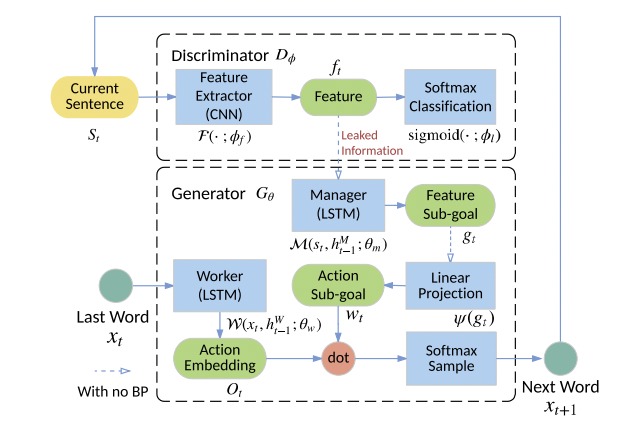

## Pure realization

In [ ]:
class LeakGANDiscriminator(UnconditionalGenerator):
    """CNN based discriminator for leakgan extracting feature of current sentence"""

    def __init__(self, config, dataset):
        super(LeakGANDiscriminator, self).__init__(config, dataset)

        self.embedding_size = config['discriminator_embedding_size']
        self.l2_reg_lambda = config['l2_reg_lambda']
        self.dropout_rate = config['dropout_rate']
        self.filter_sizes = config['filter_sizes']
        self.filter_nums = config['filter_nums']
        self.max_length = config['seq_len'] + 1
        self.filter_sum = sum(self.filter_nums)

        self.word_embedding = nn.Embedding(self.vocab_size, self.embedding_size)
        self.dropout = nn.Dropout(self.dropout_rate)
        self.filters = nn.ModuleList([])

        for (filter_size, filter_num) in zip(self.filter_sizes, self.filter_nums):
            self.filters.append(
                nn.Sequential(
                    nn.Conv2d(1, filter_num, (filter_size, self.embedding_size), stride=1, padding=0, bias=True),
                    nn.ReLU(),
                    nn.MaxPool2d((self.max_length - filter_size + 1, 1), stride=1, padding=0),
                )
            )

        self.W_T = nn.Linear(self.filter_sum, self.filter_sum)
        self.W_H = nn.Linear(self.filter_sum, self.filter_sum, bias=False)
        self.W_O = nn.Linear(self.filter_sum, 2)

    def highway(self, data):
        tau = torch.sigmoid(self.W_T(data))
        non_linear = F.relu(self.W_H(data))

        return self.dropout(tau * non_linear + (1 - tau) * data)

    def forward(self, data):  # b * len
        """Get current sentence feature by CNN"""
        C_tilde = self.get_feature(data)
        pred = self.W_O(C_tilde)

        return pred

    def get_feature(self, inp):
        """Get feature vector of given sentences

        Args:
            inp: batch_size * max_seq_len

        Returns:
            batch_size * feature_dim
        """
        data = self.word_embedding(inp).unsqueeze(1)  # b * len * e -> b * 1 * len * e
        combined_outputs = []
        for CNN_filter in self.filters:
            output = CNN_filter(data)
            combined_outputs.append(output)
        combined_outputs = torch.cat(combined_outputs, 1)  # b * tot_f_n :pred
        combined_outputs = combined_outputs.squeeze(dim=3).squeeze(dim=2)

        C_tilde = self.highway(combined_outputs)  # b * tot_f_n

        return C_tilde

    def calculate_loss(self, real_data, fake_data):
        """Calculate discriminator loss and acc"""
        real_y = self.forward(real_data)
        fake_y = self.forward(fake_data)
        pre_logits = torch.cat([real_y, fake_y], dim=0)

        real_label = torch.ones_like(real_y, dtype=torch.int64)[:, 0].long()  # [1,1,1]
        fake_label = torch.zeros_like(fake_y, dtype=torch.int64)[:, 0].long()  # [0,0,0]
        label = torch.cat([real_label, fake_label], dim=-1)
        loss = F.cross_entropy(pre_logits, label)

        loss = loss + self.l2_reg_lambda * (torch.norm(self.W_O.weight, 2) + torch.norm(self.W_O.bias, 2))

        pred = torch.cat([real_y, fake_y], dim=0)  # bs*2
        target = torch.cat([real_label, fake_label], dim=0)  # bs
        acc = torch.sum((pred.argmax(dim=-1) == target)).item()
        acc = acc / pred.size()[0]
        return loss, acc

In [ ]:
class LeakGANGenerator(UnconditionalGenerator):
    """LeakGAN generator consist of worker(LSTM) and manager(LSTM)"""

    def __init__(self, config, dataset):
        super(LeakGANGenerator, self).__init__(config, dataset)
        self.hidden_size = config['hidden_size']
        self.embedding_size = config['generator_embedding_size']
        self.max_length = config['seq_len'] + 1  # max_length is the length of origin_max_len + sos
        self.monte_carlo_num = config['Monte_Carlo_num']
        self.filter_nums = config['filter_nums']
        self.goal_out_size = sum(self.filter_nums)
        self.goal_size = config['goal_size']
        self.step_size = config['step_size']
        self.temperature = config['temperature']
        self.dis_sample_num = config['d_sample_num']

        self.word_embedding = nn.Embedding(self.vocab_size, self.embedding_size)
        self.vocab_projection = nn.Linear(self.hidden_size, self.vocab_size)

        self.worker = nn.LSTM(self.embedding_size, self.hidden_size)
        self.manager = nn.LSTM(self.goal_out_size, self.hidden_size)

        self.work2goal = nn.Linear(self.hidden_size, self.vocab_size * self.goal_size)
        self.mana2goal = nn.Linear(self.hidden_size, self.goal_out_size)
        self.goal2goal = nn.Linear(self.goal_out_size, self.goal_size, bias=False)

        self.goal_init = nn.Parameter(torch.rand((self.batch_size, self.goal_out_size)))

    def pretrain_loss(self, corpus, dis):
        """Return the generator pretrain loss for predicting target sequence.

        Args:
            corpus: target_text(bs*seq_len)
            dis: discriminator model

        Returns:
            manager_loss: manager loss
            work_cn_loss: worker loss
        """
        targets = corpus[:, 1:]  # not use sos token
        batch_size, seq_len = targets.size()  # bs*max_seq_len
        leak_out_array, feature_array, goal_array = self.leakgan_forward(targets, dis, train=False, pretrain=True)

        # Manager loss
        mana_cos_loss = self.manager_cos_loss(
            batch_size, feature_array, goal_array
        )  # batch_size * (seq_len / step_size)
        manager_loss = -torch.sum(mana_cos_loss) / (self.batch_size * self.max_length / self.step_size)
        # Worker loss
        work_cn_loss = self.worker_cross_entropy_loss(targets, leak_out_array)

        return manager_loss, work_cn_loss

    def calculate_loss(self, targets, dis):
        """Returns the nll test for predicting target sequence.

        Args:
            targets: target_idx(bs*seq_len) ,
            dis: discriminator model

        Returns:
            worker_loss: the generator test nll
        """
        batch_size, seq_len = targets.size()
        leak_out_array, feature_array, goal_array = self.leakgan_forward(targets, dis, pretrain=True)

        # Worker loss
        work_nll_loss = self.worker_nll_loss(targets, leak_out_array)  # batch_size * seq_len
        work_nll_loss = work_nll_loss.contiguous().reshape((batch_size, seq_len))
        work_nll_loss = torch.sum(work_nll_loss, dim=1)  # bs
        worker_loss = torch.mean(work_nll_loss)

        return worker_loss

    def forward(self, idx, inp, work_hidden, mana_hidden, feature, real_goal, train=False, pretrain=False):
        """Embed input and sample on token at a time (seq_len = 1)

        Args:
            idx: index of current token in sentence
            inp: current input token for a batch [batch_size]
            work_hidden: 1 * batch_size * hidden_dim
            mana_hidden: 1 * batch_size * hidden_dim
            feature: 1 * batch_size * total_num_filters, feature of current sentence
            real_goal: batch_size * goal_out_size, real_goal in LeakGAN source code
            train: whether train or inference
            pretrain: whether pretrain or not pretrain

        Returns:
            out: current output prob over vocab with log_softmax or softmax bs*vocab_size
            cur_goal: bs * 1 * goal_out_size
            work_hidden: 1 * batch_size * hidden_dim
            mana_hidden: 1 * batch_size * hidden_dim
        """
        emb = self.word_embedding(inp).unsqueeze(0)  # 1 * batch_size * embed_dim

        # Manager
        mana_out, mana_hidden = self.manager(feature, mana_hidden)  # mana_out: 1 * batch_size * hidden_dim
        mana_out = self.mana2goal(mana_out.permute([1, 0, 2]))  # batch_size * 1 * goal_out_size
        cur_goal = F.normalize(mana_out, p=2, dim=-1).squeeze(dim=1)
        _real_goal = self.goal2goal(real_goal)  # batch_size * goal_size
        _real_goal = F.normalize(_real_goal, p=2, dim=-1).unsqueeze(-1)  # batch_size * goal_size * 1

        # Worker
        work_out, work_hidden = self.worker(emb, work_hidden)  # work_out: 1 * batch_size * hidden_dim
        work_out = self.work2goal(work_out.squeeze(dim=0))  # bs * (vocab*goal)
        work_out = work_out.contiguous().view(
            -1, self.vocab_size, self.goal_size
        )  # batch_size * vocab_size * goal_size

        # Sample token
        out = torch.matmul(work_out, _real_goal).squeeze(-1)  # batch_size * vocab_size

        # Temperature control
        if idx > 1:
            if train:  # if train we should use a min temperature to modify the out distribution
                temperature = 0.9
            else:
                temperature = self.temperature
        else:
            temperature = self.temperature

        if not pretrain:
            out = temperature * out  # bs * vocab

        return out, cur_goal, work_hidden, mana_hidden

    def leakgan_forward(self, targets, dis, train=False, pretrain=False):
        r"""Get all feature and goals according to given sentences

        Args:
            targets: batch_size * max_seq_len, pad eos token if the original sentence length less than max_seq_len
            dis: discriminator model
            train: if use temperature parameter
            pretrain: whether pretrain or not pretrain

        Returns:
            feature_array: batch_size * (seq_len + 1) * total_num_filter
            goal_array: batch_size * (seq_len + 1) * goal_out_size
            leak_out_array: batch_size * seq_len * vocab_size with log_softmax
        """
        batch_size, seq_len = targets.size()  # seq_len = max_seq_len

        feature_array = torch.zeros((batch_size, self.max_length + 1, self.goal_out_size))
        goal_array = torch.zeros((batch_size, self.max_length + 1, self.goal_out_size))
        leak_out_array = torch.zeros((batch_size, self.max_length + 1, self.vocab_size))
        feature_array = feature_array.to(self.device)
        goal_array = goal_array.to(self.device)
        leak_out_array = leak_out_array.to(self.device)

        work_hidden = self.init_hidden(batch_size)
        mana_hidden = self.init_hidden(batch_size)
        # Special operations for step 0
        leak_inp_t = torch.LongTensor([self.sos_token_idx] * batch_size)  # the input token for worker at step t
        cur_dis_inp = torch.LongTensor([self.padding_token_idx] * batch_size * seq_len
                                       )  # current sentence for dis ar step t
        cur_dis_inp = cur_dis_inp.view((batch_size, seq_len))  # bs*seq_len
        leak_inp_t = leak_inp_t.to(self.device)
        cur_dis_inp = cur_dis_inp.to(self.device)

        real_goal = self.goal_init[:batch_size, :]  # init real goal
        goal_array[:, 0, :] = real_goal
        last_goal = torch.zeros_like(real_goal)
        feature = dis.get_feature(cur_dis_inp).unsqueeze(0)  # !!!note: 1 * batch_size * total_num_filters
        feature_array[:, 0, :] = feature.squeeze(0)  # batch_size * total_num_filters
        # Update the hidden state of manager using the current all padding token
        _, mana_hidden = self.manager(feature, mana_hidden)  # mana_out: 1 * batch_size * hidden_dim

        for i in range(1, self.max_length + 1):
            # get current dis inp which giving the real top i token and padding token
            given_dis_inp = targets[:, :i]  # bs*i
            cur_dis_inp = torch.cat([given_dis_inp, cur_dis_inp], dim=1)
            cur_dis_inp = cur_dis_inp[:, :seq_len].long()
            # get feature
            feature = dis.get_feature(cur_dis_inp).unsqueeze(0)  # !!!note: 1 * batch_size * total_num_filters
            feature_array[:, i, :] = feature.squeeze(0)  # batch_size * total_num_filters
            # using input_t and feature_t to get token_t+1
            # out is the log softmax over vocab distribution
            out, cur_goal, work_hidden, mana_hidden = self.forward(
                i, leak_inp_t, work_hidden, mana_hidden, feature, real_goal, train=train, pretrain=pretrain
            )
            leak_out_array[:, i - 1, :] = out
            # save the current goal_t
            goal_array[:, i, :] = cur_goal

            # update real goal every step_size steps
            if i % self.step_size == 0:
                real_goal = torch.sum(goal_array[:, i - 3:i + 1, :], dim=1)  # g1 -> g4

            # use the real input token during train
            leak_inp_t = targets[:, i - 1]
            leak_inp_t = leak_inp_t.to(self.device)
        # cur to seq_len
        leak_out_array = leak_out_array[:, :seq_len, :]

        return leak_out_array, feature_array, goal_array

    def sample_batch(self):
        """Sample a batch of data"""
        self.eval()
        sentences = []
        with torch.no_grad():
            h_prev = torch.zeros(1, self.batch_size, self.hidden_size, device=self.device)  # 1 * b * h
            o_prev = torch.zeros(1, self.batch_size, self.hidden_size, device=self.device)  # 1 * b * h
            prev_state = (h_prev, o_prev)
            X = self.word_embedding(
                torch.tensor([self.sos_token_idx] * self.batch_size, dtype=torch.long, device=self.device)
            ).unsqueeze(0)  # 1 * b * e
            sentences = torch.zeros((self.max_length, self.batch_size), dtype=torch.long, device=self.device)
            sentences[0] = self.sos_token_idx

            for i in range(1, self.max_length):
                output, prev_state = self.LSTM(X, prev_state)
                P = F.softmax(self.vocab_projection(output), dim=-1).squeeze(0)  # b * v
                for j in range(self.batch_size):
                    sentences[i][j] = torch.multinomial(P[j], 1)[0]
                X = self.word_embedding(sentences[i]).unsqueeze(0)  # 1 * b * e

            sentences = sentences.permute(1, 0)  # b * l

            for i in range(self.batch_size):
                end_pos = (sentences[i] == self.eos_token_idx).nonzero(as_tuple=False)
                if (end_pos.shape[0]):
                    sentences[i][end_pos[0][0] + 1:] = self.padding_token_idx

        self.train()

        return sentences

    def sample(self, sample_num, dis, start_letter, train=False):
        """Sample sentences"""
        num_batch = sample_num // self.batch_size + 1 if sample_num != self.batch_size else 1
        samples = torch.zeros(num_batch * self.batch_size, self.max_length).long()  # larger than num_samples
        fake_sentences = torch.zeros((self.batch_size, self.max_length))
        fake_sentences[:, :] = self.padding_token_idx

        for b in range(num_batch):
            leak_sample = self.leakgan_generate(fake_sentences, dis, train=train)

            assert leak_sample.shape == (self.batch_size, self.max_length)
            samples[b * self.batch_size:(b + 1) * self.batch_size, :] = leak_sample

        samples = samples[:sample_num, :]
        samples = samples.to(self.device)

        return samples

    def leakgan_generate(self, targets, dis, train=False):
        batch_size, seq_len = targets.size()
        samples = []
        log_probs = []

        work_hidden = self.init_hidden(batch_size)
        mana_hidden = self.init_hidden(batch_size)

        real_goal = self.goal_init[:batch_size, :]  # init real goal
        last_goal = torch.zeros_like(real_goal)

        for i in range(0, self.max_length):
            if i == 0:
                leak_inp_t = torch.LongTensor([self.sos_token_idx] * batch_size)  # the input token for worker at step t
                cur_dis_inp = torch.LongTensor([self.padding_token_idx] * batch_size * seq_len)  # current sentence for dis ar step t
                cur_dis_inp = cur_dis_inp.view((batch_size, seq_len))  # bs*seq_len
            else:
                leak_inp_t = gen_x
                cur_dis_inp = torch.cat([gen_x.unsqueeze(dim=1), cur_dis_inp], dim=-1)
                cur_dis_inp = cur_dis_inp[:, :self.max_length].long()
            leak_inp_t = leak_inp_t.to(self.device)
            cur_dis_inp = cur_dis_inp.to(self.device)

            # get feature
            feature = dis.get_feature(cur_dis_inp).unsqueeze(0)  # !!!note: 1 * batch_size * total_num_filters

            # using input_t and feature_t to get token_t+1
            # out is the softmax over vocab distribution
            out, cur_goal, work_hidden, mana_hidden = self.forward(
                i, leak_inp_t, work_hidden, mana_hidden, feature, real_goal, train=train, pretrain=False
            )
            out_dis = Categorical(F.softmax(out, dim=-1))  # bs * vocab
            gen_x = out_dis.sample()  # bs
            gen_x_prob = out_dis.log_prob(gen_x)
            samples.append(gen_x)
            log_probs.append(gen_x_prob)

            last_goal = last_goal + cur_goal

            # update real goal every step_size steps
            if (i + 1) % self.step_size == 0:
                real_goal = last_goal
                last_goal = torch.zeros_like(real_goal)

        samples = torch.stack(samples, dim=1)
        log_probs = torch.stack(log_probs, dim=1)
        samples = samples.to(self.device)
        log_probs = log_probs.to(self.device)
        return samples

    def generate(self, batch_data, eval_data, dis):
        """Generate sentences"""
        fake_sentences = torch.zeros((self.batch_size, self.max_length))
        idx2token = eval_data.idx2token
        batch_size = len(batch_data['target_text'])

        samples = self.leakgan_generate(fake_sentences, dis)
        samples = samples[:batch_size]
        samples = samples.tolist()
        texts = []
        for sen in samples:
            text = []
            for w in sen:
                if w != self.eos_token_idx:
                    text.append(idx2token[w])
                else:
                    break
            texts.append(text)

        return texts

    def adversarial_loss(self, dis):
        """Generate data and calculate adversarial loss"""
        with torch.no_grad():
            gen_samples = self.sample(
                self.batch_size, dis, self.sos_token_idx, train=True
            )  # !!! train=True, the only place

        rewards = self.get_reward_leakgan(gen_samples, self.monte_carlo_num, dis).cpu()  # reward with MC search
        mana_loss, work_loss = self.get_adv_loss(gen_samples, rewards, dis)

        return (mana_loss, work_loss)

    def init_hidden(self, batch_size=1):
        """Init hidden state for lstm"""
        h = torch.zeros(1, batch_size, self.hidden_size)
        c = torch.zeros(1, batch_size, self.hidden_size)

        h = h.to(self.device)
        c = c.to(self.device)
        return h, c

    def manager_cos_loss(self, batch_size, feature_array, goal_array):
        """Get manager cosine distance loss

        Returns:
            cos_loss: batch_size * (seq_len / step_size)
        """
        sub_feature = torch.zeros(batch_size, self.max_length // self.step_size, self.goal_out_size)
        real_goal = torch.zeros(batch_size, self.max_length // self.step_size, self.goal_out_size)
        for i in range(self.max_length // self.step_size):
            idx = i * self.step_size  # 0, 4, 8, 16, 20
            sub_feature[:, i, :] = feature_array[:, idx + self.step_size, :] - feature_array[:, idx, :]

            if i == 0:
                real_goal[:, i, :] = goal_array[:, i, :]
            else:
                idx = (i - 1) * self.step_size + 1
                real_goal[:, i, :] = torch.sum(goal_array[:, idx:idx + 4, :], dim=1)

        # L2 noramlization
        sub_feature = F.normalize(sub_feature, p=2, dim=-1)
        real_goal = F.normalize(real_goal, p=2, dim=-1)

        cos_loss = F.cosine_similarity(sub_feature, real_goal, dim=-1)

        return cos_loss

    def worker_cross_entropy_loss(self, target, leak_out_array, reduction='mean'):
        """Get CrossEntropy loss for worker"""
        loss_fn = nn.CrossEntropyLoss(reduction=reduction)
        leak_out_array = leak_out_array.contiguous()
        leak_out_array = leak_out_array.reshape((-1, self.vocab_size))
        target = target.contiguous()
        target = target.reshape((-1))
        loss = loss_fn(leak_out_array, target)

        return loss

    def worker_nll_loss(self, target, leak_out_array):
        """Get nll loss for worker"""
        loss_fn = nn.NLLLoss(reduction='none')
        leak_out_array = leak_out_array.contiguous()
        leak_out_array = leak_out_array.reshape((-1, self.vocab_size))
        leak_out_array = torch.log_softmax(leak_out_array, dim=-1)
        target = target.contiguous()
        target = target.reshape((-1))

        loss = loss_fn(leak_out_array, target)

        return loss

    def worker_cos_reward(self, feature_array, goal_array):
        """Get reward for worker (cosine distance)

        Returns:
            cos_loss: batch_size * seq_len
        """
        for i in range(self.max_length // self.step_size):
            real_feature = feature_array[:, i * self.step_size, :].unsqueeze(1).expand((-1, self.step_size, -1))
            feature_array[:, i * self.step_size:(i + 1) * self.step_size, :] = real_feature
            if i > 0:
                sum_goal = torch.sum(goal_array[:, (i - 1) * self.step_size:i * self.step_size, :], dim=1, keepdim=True)
            else:
                sum_goal = goal_array[:, 0, :].unsqueeze(1)
            goal_array[:, i * self.step_size:(i + 1) * self.step_size, :] = sum_goal.expand((-1, self.step_size, -1))

        offset_feature = feature_array[:, 1:, :]  # f_{t+1}, batch_size * seq_len * goal_out_size
        goal_array = goal_array[:, :self.max_length, :]  # batch_size * seq_len * goal_out_size
        sub_feature = offset_feature - goal_array

        # L2 normalization
        sub_feature = F.normalize(sub_feature, p=2, dim=-1)
        all_goal = F.normalize(goal_array, p=2, dim=-1)

        cos_loss = F.cosine_similarity(sub_feature, all_goal, dim=-1)  # batch_size * seq_len
        return cos_loss

    def split_params(self):
        """Split parameter into worker and manager"""
        mana_params = list()
        work_params = list()

        mana_params += list(self.manager.parameters())
        mana_params += list(self.mana2goal.parameters())
        mana_params.append(self.goal_init)

        work_params += list(self.word_embedding.parameters())
        work_params += list(self.worker.parameters())
        work_params += list(self.work2goal.parameters())
        work_params += list(self.goal2goal.parameters())

        return mana_params, work_params

    def get_reward_leakgan(self, sentences, rollout_num, dis, current_k=0):
        """Get reward via Monte Carlo search for LeakGAN

        Args:
            sentences: size of batch_size * max_seq_len
            rollout_num: numbers of rollout
            dis: discriminator
            current_k: current training gen

        Returns:
            reward: batch_size * (max_seq_len / step_size)
        """
        with torch.no_grad():
            batch_size = sentences.size(0)
            rewards = torch.zeros([rollout_num * (self.max_length // self.step_size), batch_size]).float()
            rewards = rewards.to(self.device)
            idx = 0
            for i in range(rollout_num):
                for t in range(1, self.max_length // self.step_size):
                    given_num = t * self.step_size  # 4, 8, 12, ..
                    # given current words and search a complete sentence by mc
                    samples = self.rollout_mc_search_leakgan(sentences, dis, given_num)
                    out = dis(samples)  # bs*2
                    out = F.softmax(out, dim=-1)
                    # using the prob of true computed by dis as the reward for current action reward
                    reward = out[:, current_k + 1]  # bs
                    rewards[idx] = reward
                    idx += 1

                last_token_out = dis(sentences)
                last_token_out = F.softmax(last_token_out, dim=-1)
                last_token_reward = last_token_out[:, current_k + 1]
                rewards[idx] = last_token_reward
                idx += 1

        rewards = rewards.contiguous()
        rewards = rewards.view(batch_size, self.max_length // self.step_size, rollout_num)
        rewards = torch.sum(rewards, dim=-1)
        rewards_ = torch.mean(rewards, dim=-1)
        rewards = self.rescale(rewards, rollout_num)
        rewards = rewards / (1.0 * rollout_num)
        # rewards = torch.mean(rewards, dim=-1)
        return rewards

    def rescale(self, reward, rollout_num=1.0):
        """Rescale reward according to original paper"""
        ret = torch.zeros_like(reward)
        reward = reward.cpu().numpy()
        x, y = reward.shape
        for i in range(x):
            l = reward[i]
            rescalar = {}
            for s in l:
                rescalar[s] = s
            idxx = 1
            min_s = 1.0
            max_s = 0.0
            for s in rescalar:
                rescalar[s] = self.redistribution(idxx, len(l), min_s)
                idxx += 1
            for j in range(y):
                ret[i, j] = rescalar[reward[i, j]]
        return ret

    def redistribution(self, idx, total, min_v):
        idx = (idx + 0.0) / (total + 0.0) * 16.0
        return (math.exp(idx - 8.0) / (1.0 + math.exp(idx - 8.0)))

    def rollout_mc_search_leakgan(self, targets, dis, given_num):
        """Roll out to get mc search results"""
        batch_size, seq_len = targets.size()
        work_hidden = self.init_hidden(batch_size)
        mana_hidden = self.init_hidden(batch_size)
        real_goal = self.goal_init[:batch_size, :]
        out = 0

        leak_inp_t = torch.LongTensor([self.sos_token_idx] * batch_size)  # the input token for worker at step t
        cur_dis_inp = torch.LongTensor([self.padding_token_idx] * batch_size * seq_len
                                       )  # current sentence for dis ar step t
        cur_dis_inp = cur_dis_inp.view((batch_size, seq_len))  # bs*seq_len
        leak_out_array = []
        leak_inp_t = leak_inp_t.to(self.device)
        cur_dis_inp = cur_dis_inp.to(self.device)
        targets = targets.to(self.device)

        real_goal = self.goal_init[:batch_size, :]  # init real goal
        last_goal = torch.zeros_like(real_goal)
        feature = dis.get_feature(cur_dis_inp).unsqueeze(0)  # !!!note: 1 * batch_size * total_num_filters
        # Update the hidden state of manager using the current all padding token
        _, mana_hidden = self.manager(feature, mana_hidden)  # mana_out: 1 * batch_size * hidden_dim

        # get current state
        for i in range(1, given_num + 1):
            # get current dis inp which giving the real top i token and padding token
            given_dis_inp = targets[:, :i]  # bs*i
            cur_dis_inp = torch.cat([given_dis_inp, cur_dis_inp], dim=1)
            cur_dis_inp = cur_dis_inp[:, :seq_len].long()
            # get feature
            feature = dis.get_feature(cur_dis_inp).unsqueeze(0)  # !!!note: 1 * batch_size * total_num_filters
            # using input_t and feature_t to get token_t+1
            # out is the log softmax over vocab distribution
            out, cur_goal, work_hidden, mana_hidden = self.forward(
                i, leak_inp_t, work_hidden, mana_hidden, feature, real_goal, train=False, pretrain=False
            )

            leak_out_array.append(targets[:, i - 1])

            last_goal = last_goal + cur_goal
            leak_inp_t = targets[:, i - 1]
            leak_inp_t = leak_inp_t.to(self.device)

            # update real goal every step_size steps
            if i % self.step_size == 0:
                real_goal = last_goal
                last_goal = torch.zeros_like(real_goal)

        # MC search
        for i in range(given_num + 1, self.max_length + 1):
            # get the generated token
            gen_x = torch.stack(leak_out_array, dim=-1)
            gen_x = gen_x.to(self.device)

            cur_dis_inp = torch.cat([gen_x, targets], dim=-1)
            cur_dis_inp = cur_dis_inp[:, :seq_len].long()
            # get feature
            feature = dis.get_feature(cur_dis_inp).unsqueeze(0)  # !!!note: 1 * batch_size * total_num_filters
            # using input_t and feature_t to get token_t+1
            # out is the log softmax over vocab distribution
            out, cur_goal, work_hidden, mana_hidden = self.forward(
                i, leak_inp_t, work_hidden, mana_hidden, feature, real_goal, train=True, pretrain=False
            )

            # sample one token
            out_dis = Categorical(F.softmax(out))
            leak_inp_t = out_dis.sample()  # bs

            leak_inp_t = leak_inp_t.to(self.device)
            leak_out_array.append(leak_inp_t)

            last_goal = last_goal + cur_goal
            # update real goal every step_size steps
            if i % self.step_size == 0:
                real_goal = last_goal
                last_goal = torch.zeros_like(real_goal)

        gen_x = torch.stack(leak_out_array, dim=-1)
        gen_x = gen_x[:, :seq_len]
        gen_x = gen_x.to(self.device)

        return gen_x

    def get_adv_loss(self, target, rewards, dis):
        """Return a pseudo-loss that gives corresponding policy gradients (on calling .backward()).
        Inspired by the example in http://karpathy.github.io/2016/05/31/rl/

        Args: target, rewards, dis, start_letter
            target: batch_size * seq_len
            rewards: batch_size * seq_len (discriminator rewards for each token)
        """
        batch_size, seq_len = target.size()
        leak_out_array, feature_array, goal_array = self.leakgan_forward(target, dis, train=True)

        # Manager Loss
        mana_cos_loss = self.manager_cos_loss(
            batch_size, feature_array, goal_array
        )  # batch_size * (seq_len / step_size)
        mana_loss = -torch.mean(rewards * mana_cos_loss)

        # Worker Loss
        work_cn_loss = self.worker_cross_entropy_loss(target, leak_out_array, reduction='none')  # batch_size * seq_len
        work_cos_reward = self.worker_cos_reward(feature_array, goal_array)  # batch_size * seq_len
        work_cos_reward = work_cos_reward.contiguous().reshape((-1))
        work_loss = -torch.mean(work_cn_loss * work_cos_reward)

        return mana_loss, work_loss

In [ ]:
class LeakGANTrainer(GANTrainer):
    """Specified for leakgan trainer"""

    def __init__(self, config, model):
        super(LeakGANTrainer, self).__init__(config, model)
        self.interleaved_pretrain_epoch = config['interleaved_pretrain_epoch']
        self.adversarail_g_epochs = config['adversarail_g_epochs']
        gen_lr = 0.001 #config['generator_lr']  # 0.001
        dis_lr = 0.00005 #config['discriminator_lr']  # 0.00005
        self.g_optimizer = self._build_module_optimizer_(self.model.generator, gen_lr)  # (manager_opt, worker_opt)
        self.d_optimizer = self._build_module_optimizer_(self.model.discriminator, dis_lr)
        self.iters_num = 100 #config['iter_num']
        self.eos_token_idx = model.eos_token_idx

    def _build_module_optimizer_(self, module, learing_rate):
        """Specified for leakgan"""
        multi_flag = False
        if module._get_name() == 'LeakGANGenerator':
            manager_params, worker_params = module.split_params()
            multi_flag = True

        if self.learner.lower() == 'adam':
            if multi_flag:
                manager_opt = optim.Adam(manager_params, lr=learing_rate)
                worker_opt = optim.Adam(worker_params, lr=learing_rate)
            else:
                optimizer = optim.Adam(module.parameters(), lr=learing_rate)
        elif self.learner.lower() == 'sgd':
            if multi_flag:
                manager_opt = optim.SGD(manager_params, lr=learing_rate)
                worker_opt = optim.SGD(worker_params, lr=learing_rate)
            else:
                optimizer = optim.SGD(module.parameters(), lr=learing_rate)
        elif self.learner.lower() == 'adagrad':
            if multi_flag:
                manager_opt = optim.Adagrad(manager_params, lr=learing_rate)
                worker_opt = optim.Adagrad(worker_params, lr=learing_rate)
            else:
                optimizer = optim.Adagrad(module.parameters(), lr=learing_rate)
        elif self.learner.lower() == 'rmsprop':
            if multi_flag:
                manager_opt = optim.RMSprop(manager_params, lr=learing_rate)
                worker_opt = optim.RMSprop(worker_params, lr=learing_rate)
            else:
                optimizer = optim.RMSprop(module.parameters(), lr=learing_rate)
        else:
            self.logger.warning('Received unrecognized optimizer, set default Adam optimizer')
            if multi_flag:
                manager_opt = optim.Adam(manager_params, lr=learing_rate)
                worker_opt = optim.Adam(worker_params, lr=learing_rate)
            else:
                optimizer = optim.Adam(module.parameters(), lr=learing_rate)
        if multi_flag:
            return (manager_opt, worker_opt)
        else:
            return optimizer

    def _optimize_step(self, losses, total_loss, model, opt):
        """Specified for leakgan optimize"""
        if isinstance(losses, tuple):
            loss = sum(losses)
            loss_tuple = tuple(per_loss.item() for per_loss in losses)
            total_loss = loss_tuple if total_loss is None else tuple(map(sum, zip(total_loss, loss_tuple)))
        else:
            loss = losses
            total_loss = losses.item() if total_loss is None else total_loss + losses.item()
        self._check_nan(loss)

        if isinstance(losses, tuple):
            for i, (o, loss) in enumerate(zip(opt, losses)):
                o.zero_grad()
                loss.backward(retain_graph=True if i < len(opt) - 1 else False)
                torch.nn.utils.clip_grad_norm_(model.parameters(), self.grad_clip)

            for o in opt:
                o.step()
        else:
            opt.zero_grad()
            losses.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), self.grad_clip)
            opt.step()

        return total_loss

    def _generate_train_loss_output(self, epoch_idx, s_time, e_time, losses, train_info=""):
        """Specified for leakgan output format"""
        train_loss_output = "%straining [time: %.2fs, " % (train_info, e_time - s_time)
        if isinstance(losses, dict):
            for key, loss in losses.items():
                train_loss_output += '%s: %.4f, ' % (key, loss)
            train_loss_output = train_loss_output[:-2]
        else:
            train_loss_output += "train loss: %.4f" % losses
        return train_loss_output + ']'

    def _add_eos(self, data, length):
        batch_size = data.shape[0]
        padded_data = torch.full((batch_size, self.max_length),
                                 self.eos_token_idx,
                                 dtype=torch.long,
                                 device=self.device)
        for i in range(batch_size):
            len = length[i].cpu().data
            padded_data[i, :len] = data[i, :len]
        return padded_data

    def _get_real_data(self, train_data):
        """Specified for leakgan which use eos_idx pad not pad_idx"""
        real_datas = []
        for corpus in train_data:
            real_data = corpus['target_idx']
            length = corpus['target_length']
            real_data = self._add_eos(real_data, length)
            real_datas.append(real_data)

        real_datas = torch.cat(real_datas, dim=0)
        return real_datas

    def _adversarial_train_epoch(self, train_data, epoch_idx):
        """Specified for leakgan adversarial training"""
        self.model.generator.train()
        total_g_loss = None
        total_d_loss = 0
        total_d_acc = 0
        adv_mana_loss = 0
        adv_work_loss = 0
        adv_d_loss = 0
        for e in range(self.adversarail_g_epochs):
            losses = self.model.calculate_g_adversarial_loss(epoch_idx=e)
            total_g_loss = self._optimize_step(losses, total_g_loss, self.model.generator, self.g_optimizer)
        adv_mana_loss, adv_work_loss = total_g_loss
        adv_mana_loss = adv_mana_loss / self.adversarail_g_epochs
        adv_work_loss = adv_work_loss / self.adversarail_g_epochs

        for e in range(self.adversarail_d_epochs):
            loss_dict = self._d_train_epoch(train_data, epoch_idx=epoch_idx)
            total_d_loss = total_d_loss + loss_dict['total_loss']
            total_d_acc = total_d_acc + loss_dict['train_acc']
        adv_d_loss = total_d_loss / self.adversarail_d_epochs
        adv_c_loss = total_d_acc / self.adversarail_d_epochs
        return {"mana_loss": adv_mana_loss, "work_loss": adv_work_loss, "dis_loss": adv_d_loss, "train_acc": adv_c_loss}

    def _g_train_epoch(self, train_data, epoch_idx):
        total_loss = None
        real_data = self._get_real_data(train_data)
        real_dataloader = DataLoader(real_data, batch_size=self.model.batch_size, shuffle=True, drop_last=True)
        for batch_idx, data in enumerate(real_dataloader):
            # interaction = interaction.to(self.device)
            losses = self.model.calculate_g_train_loss(data, epoch_idx=epoch_idx)
            total_loss = self._optimize_step(losses, total_loss, self.model.generator, self.g_optimizer)
        total_loss = [l / len(real_dataloader)
                      for l in total_loss] if isinstance(total_loss, tuple) else total_loss / len(train_data)
        mana_loss, work_loss = total_loss
        return {"mana_loss": mana_loss, "work_loss": work_loss}

    def _d_train_epoch(self, train_data, epoch_idx):
        total_loss = None
        total_acc = 0
        real_data = self._get_real_data(train_data)
        real_dataloader = DataLoader(real_data, batch_size=self.model.batch_size, shuffle=True, drop_last=True)
        # not need sample self.d_sample_num numbers becauese only train discriminator 5 batch
        d_sample_num = (self.d_sample_training_epochs + 1) * self.model.batch_size
        fake_data = self.model.sample(d_sample_num)

        fake_dataloader = DataLoader(fake_data, batch_size=self.model.batch_size, shuffle=True, drop_last=True)

        idx = 0
        for real_data, fake_data in zip(real_dataloader, fake_dataloader):
            # self.model.discriminator.eval() # pretraining not use dropout
            if idx == self.d_sample_training_epochs:
                break
            losses, acc = self.model.calculate_d_train_loss(real_data, fake_data, epoch_idx=epoch_idx)
            total_loss = self._optimize_step(losses, total_loss, self.model.discriminator, self.d_optimizer)
            total_acc = total_acc + acc
            idx += 1

        total_loss = total_loss / self.d_sample_training_epochs
        total_acc = total_acc / self.d_sample_training_epochs

        return {"total_loss": total_loss, "train_acc": total_acc}

    def fit(self, train_data, valid_data=None, verbose=True, saved=True):
        # pretraining
        if verbose:
            self.logger.info(">> Start pretraining")
        # generator pretraining
        for epoch_idx in range(self.g_pretraining_epochs):  # 80
            if verbose:
                self.logger.info(
                    ">>>> [Pretrain Gen] Start %d / %d epochs generator pretraining" %
                    (epoch_idx + 1, self.g_pretraining_epochs)
                )
            training_start_time = time()
            train_loss = self._g_train_epoch(train_data, epoch_idx)
            training_end_time = time()
            train_loss_output = \
                self._generate_train_loss_output(epoch_idx + 1, training_start_time, training_end_time, train_loss,
                                                 "generator pre")
            train_loss_output = ">>>> " + train_loss_output
            if verbose:
                self.logger.info(train_loss_output)

        # discriminator pretraining
        for epoch_idx in range(self.d_pretraining_epochs):  # 5
            if verbose:
                self.logger.info(
                    ">>>> [Pretrain Dis]Start %d / %d epochs discriminator pretraining..." %
                    (epoch_idx + 1, self.d_pretraining_epochs)
                )
            training_start_time = time()
            train_loss = self._d_train_epoch(train_data, epoch_idx)
            training_end_time = time()
            train_loss_output = \
                self._generate_train_loss_output(epoch_idx, training_start_time, training_end_time, train_loss,
                                                 "discriminator pre")
            train_loss_output = ">>>> " + train_loss_output
            if verbose:
                self.logger.info(train_loss_output)
        if verbose:
            self.logger.info(">> End pretraining")

        # adversarial training
        if verbose:
            self.logger.info(">> Start adversarial training")
        for epoch in range(int(self.iters_num / self.adversarail_training_epochs)):
            if verbose:
                self.logger.info(">>>> [Adv] Start epoch %d / 10 interleaved adversarial training" % (epoch + 1))

            for epoch_idx in range(self.adversarail_training_epochs):
                if verbose:
                    self.logger.info(
                        ">>>>>> [Adv] Start epoch %d / %d adversarial training" %
                        (epoch_idx + 1, self.adversarail_training_epochs)
                    )
                training_start_time = time()
                train_loss = self._adversarial_train_epoch(train_data, epoch_idx)
                # self.train_loss_dict[epoch_idx] = sum(train_loss) if isinstance(train_loss, tuple) else train_loss
                training_end_time = time()
                train_loss_output = \
                    self._generate_train_loss_output((epoch_idx + 1), training_start_time, training_end_time,
                                                     train_loss,
                                                     train_info="adv ")
                train_loss_output = ">>>>>> " + train_loss_output
                if verbose:
                    self.logger.info(train_loss_output)

            # gen pretrain
            for epoch_idx in range(5):
                if verbose:
                    self.logger.info(">>>>>> [Adv] Start epoch %d / 5 pretrain generator" % (epoch_idx + 1))
                training_start_time = time()
                train_loss = self._g_train_epoch(train_data, epoch_idx)
                training_end_time = time()
                train_loss_output = \
                    self._generate_train_loss_output((epoch_idx + 1), training_start_time, training_end_time,
                                                     train_loss,
                                                     "adv generator pre")
                train_loss_output = ">>>>>> " + train_loss_output
                if verbose:
                    self.logger.info(train_loss_output)

            # dis pretrain
            for epoch_idx in range(5):  # d_steps
                if verbose:
                    self.logger.info(">>>>>> [Adv] Start epoch %d / 5 pretrain discriminator" % (epoch_idx + 1))
                training_start_time = time()
                train_loss = self._d_train_epoch(train_data, epoch_idx)
                training_end_time = time()
                train_loss_output = \
                    self._generate_train_loss_output((epoch_idx + 1), training_start_time, training_end_time,
                                                     train_loss,
                                                     "adv discriminator pre")
                train_loss_output = ">>>>>> " + train_loss_output
                if verbose:
                    self.logger.info(train_loss_output)

        self._save_checkpoint(self.adversarail_training_epochs)
        return -1, None

In [ ]:
# class Generator(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(Generator, self).__init__()

#         self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)
#         self.fc = nn.Linear(hidden_size, output_size * BATCH_SIZE)
#         self.softmax = nn.Softmax(dim=-1)

#     def forward(self, input_seq):
#         _, (hidden, _) = self.rnn(input_seq)
#         output = self.fc(hidden[-1])
#         output_probs = self.softmax(output)
#         return output_probs.reshape((BATCH_SIZE, output_size))

In [ ]:
# class Discriminator(nn.Module):
#     def __init__(self, input_size, hidden_size):
#         super(Discriminator, self).__init__()

#         self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)
#         self.fc = nn.Linear(hidden_size, BATCH_SIZE)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, input_seq):
#         # print('Desc')
#         # print("1. Input", input_seq.shape)
#         _, (hidden, _) = self.rnn(input_seq)
#         # print("2. LSTM", hidden.shape)
#         output = self.fc(hidden[-1])
#         # print("3. Linear", output.shape)
#         output_prob = self.sigmoid(output)
#         # print("4. Output", output_prob.shape)
#         return output_prob.reshape((BATCH_SIZE, 1))


In [ ]:
# class RLModule(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(RLModule, self).__init__()
#         self.rnn = nn.LSTM(input_size, hidden_size)
#         self.fc = nn.Linear(hidden_size, output_size)
#         self.softmax = nn.Softmax(dim=-1)

#     def forward(self, input_data):
#         _, (hidden, _) = self.rnn(input_data)
#         output = self.fc(hidden[-1])
        # output_probs = self.softmax(output)
#         return output_probs

In [ ]:
# class LeakGAN(nn.Module):
#     def __init__(self, generator, discriminator):
#         super(LeakGAN, self).__init__()
#         self.generator = generator
#         self.discriminator = discriminator
#         # self.rl_module = rl_module

#     def forward(self, input_data):
#         # Forward pass of LeakGAN
#         generated_data = self.generator(input_data)
#         discriminator_output = self.discriminator(generated_data)
#         # rl_output = self.rl_module(generated_data)

#         # return generated_data, discriminator_output, rl_output
#         return generated_data, discriminator_output

## Traning

In [ ]:
input_size = 10
hidden_size = 50
output_size = 10

In [ ]:
# generator = Generator(input_size, hidden_size, output_size)
# discriminator = Discriminator(input_size, hidden_size)
# leakgan = LeakGAN(generator, discriminator)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator.to(device)
discriminator.to(device)
# rl_module.to(device)
leakgan.to(device)

LeakGAN(
  (generator): Generator(
    (rnn): LSTM(10, 50, batch_first=True)
    (fc): Linear(in_features=50, out_features=40, bias=True)
    (softmax): Softmax(dim=-1)
  )
  (discriminator): Discriminator(
    (rnn): LSTM(10, 50, batch_first=True)
    (fc): Linear(in_features=50, out_features=4, bias=True)
    (sigmoid): Sigmoid()
  )
)

In [ ]:
generator_optimizer = optim.Adam(generator.parameters(), lr=0.001)
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.001)

In [ ]:
criterion_discriminator = nn.BCELoss()
criterion_rl_module = nn.CrossEntropyLoss()

In [ ]:
num_epochs = 5
for epoch in tqdm(range(num_epochs)):
    for idx, batch in tqdm(enumerate(dataloader)):
        real_data = batch.to(device)
        # print("Real data", real_data.shape)
        # Training the Discriminator
        discriminator_optimizer.zero_grad()

        real_labels = torch.ones(real_data.size(0), 1).to(device)
        real_output = discriminator(real_data)
        real_loss = criterion_discriminator(real_output, real_labels)

        fake_data = generator(real_data)
        # print("Fake data", fake_data.shape)
        fake_labels = torch.zeros(real_data.size(0), 1).to(device)
        fake_output = discriminator(fake_data.detach())
        fake_loss = criterion_discriminator(fake_output, fake_labels)

        discriminator_loss = real_loss + fake_loss
        discriminator_loss.backward()
        discriminator_optimizer.step()

        # print("Desc Loss", discriminator_loss)

        # Training the Generator
        noise = torch.rand((real_data.shape)).to(device)
        generator_optimizer.zero_grad()
        generated_data, _ = leakgan(noise)

        # print("Gen data", generated_data)

        # Compute generator loss
        generator_loss = -torch.mean(torch.log(generated_data) * real_labels)

        # Update generator parameters
        generator_loss.backward()
        generator_optimizer.step()

        # print("Gen Loss", generator_loss)


        if idx % 5_000 == 0:
          print("Epoch", epoch, "Idx", idx)
          noise = torch.rand((real_data.shape)).to(device)
          gen_data = generator(noise)

          print(gen_data)
          for r, d in zip(real_data, gen_data):
            r = r.type(torch.int64)
            d = d.type(torch.int64)
            print("Real:", tokenizer.decode(r))
            gen_text = tokenizer.decode(d)
            print("Generated:", gen_text)

            print(sentence_chrf(gen_text, ['какой-то текст']).score)

  0%|          | 0/5 [00:00<?, ?it/s]
0it [00:00, ?it/s]
13it [00:00, 128.33it/s]
29it [00:00, 145.10it/s]

Epoch 0 Idx 0
tensor([[0.0250, 0.0250, 0.0254, 0.0251, 0.0249, 0.0249, 0.0249, 0.0247, 0.0250,
         0.0252],
        [0.0249, 0.0249, 0.0248, 0.0252, 0.0248, 0.0250, 0.0252, 0.0249, 0.0248,
         0.0250],
        [0.0251, 0.0244, 0.0248, 0.0247, 0.0250, 0.0248, 0.0252, 0.0249, 0.0249,
         0.0252],
        [0.0251, 0.0253, 0.0254, 0.0251, 0.0253, 0.0253, 0.0248, 0.0251, 0.0250,
         0.0251]], device='cuda:0', grad_fn=<ViewBackward0>)
Real: [CLS] <unk> <unk> <unk> <unk> 
Generated: <pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
0.0
Real: [CLS] <unk> <unk> <unk> <unk> 
Generated: <pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
0.0
Real: [CLS] <unk> <unk> <unk> <unk>[SEP]
Generated: <pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
0.0
Real: [CLS] <unk> <unk> <unk> <unk>[SEP]
Generated: <pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
0.0



44it [00:00, 147.17it/s]
59it [00:00, 147.33it/s]
75it [00:00, 149.61it/s]
90it [00:00, 146.45it/s]
106it [00:00, 148.59it/s]
121it [00:00, 141.50it/s]
136it [00:00, 142.77it/s]
151it [00:01, 140.69it/s]
166it [00:01, 139.99it/s]
181it [00:01, 137.62it/s]
195it [00:01, 136.47it/s]
209it [00:01, 137.04it/s]
223it [00:01, 136.89it/s]
237it [00:01, 137.22it/s]
253it [00:01, 141.84it/s]
268it [00:01, 139.69it/s]
283it [00:02, 142.13it/s]
299it [00:02, 145.86it/s]
314it [00:02, 146.55it/s]
330it [00:02, 148.17it/s]
345it [00:02, 148.64it/s]
360it [00:02, 148.26it/s]
377it [00:02, 151.86it/s]
393it [00:02, 148.51it/s]
408it [00:02, 147.34it/s]
423it [00:02, 141.55it/s]
438it [00:03, 141.30it/s]
453it [00:03, 140.79it/s]
468it [00:03, 142.51it/s]
483it [00:03, 142.89it/s]
499it [00:03, 145.91it/s]
514it [00:03, 146.73it/s]
530it [00:03, 147.73it/s]
546it [00:03, 150.65it/s]
562it [00:03, 149.56it/s]
577it [00:03, 148.39it/s]
593it [00:04, 149.10it/s]
609it [00:04, 150.43it/s]
625it [00:04, 1

Epoch 1 Idx 0
tensor([[0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250],
        [0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250],
        [0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250],
        [0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250]], device='cuda:0', grad_fn=<ViewBackward0>)
Real: [CLS] <unk> <unk> <unk> <unk> 
Generated: <pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
0.0
Real: [CLS] <unk> <unk> <unk> <unk> 
Generated: <pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
0.0
Real: [CLS] <unk> <unk> <unk> <unk>[SEP]
Generated: <pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
0.0
Real: [CLS] <unk> <unk> <unk>[SEP]<pad><pad>
Generated: <pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
0.0



44it [00:00, 146.83it/s]
60it [00:00, 148.82it/s]
75it [00:00, 148.86it/s]
90it [00:00, 144.34it/s]
105it [00:00, 139.92it/s]
120it [00:00, 137.25it/s]
135it [00:00, 139.64it/s]
150it [00:01, 140.30it/s]
165it [00:01, 143.03it/s]
180it [00:01, 143.72it/s]
196it [00:01, 146.14it/s]
211it [00:01, 143.34it/s]
226it [00:01, 141.27it/s]
241it [00:01, 143.47it/s]
256it [00:01, 143.58it/s]
271it [00:01, 144.87it/s]
287it [00:01, 147.89it/s]
302it [00:02, 147.65it/s]
318it [00:02, 149.59it/s]
334it [00:02, 150.70it/s]
350it [00:02, 149.78it/s]
365it [00:02, 149.43it/s]
380it [00:02, 144.90it/s]
395it [00:02, 143.63it/s]
410it [00:02, 144.42it/s]
425it [00:02, 143.45it/s]
440it [00:03, 142.86it/s]
456it [00:03, 146.30it/s]
472it [00:03, 148.80it/s]
487it [00:03, 147.60it/s]
502it [00:03, 146.69it/s]
517it [00:03, 143.82it/s]
532it [00:03, 140.48it/s]
548it [00:03, 143.84it/s]
563it [00:03, 143.15it/s]
578it [00:04, 142.84it/s]
593it [00:04, 143.46it/s]
609it [00:04, 147.79it/s]
624it [00:04, 1

Epoch 2 Idx 0
tensor([[0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250],
        [0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250],
        [0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250],
        [0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250]], device='cuda:0', grad_fn=<ViewBackward0>)
Real: [CLS] <unk> <unk> <unk>[SEP]<pad><pad>
Generated: <pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
0.0
Real: [CLS] <unk> <unk> <unk> <unk>[SEP]
Generated: <pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
0.0
Real: [CLS] <unk> <unk> <unk> <unk> 
Generated: <pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
0.0
Real: [CLS] <unk> <unk> <unk> <unk>[SEP]
Generated: <pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
0.0


30it [00:00, 144.19it/s]
45it [00:00, 138.77it/s]
61it [00:00, 143.51it/s]
77it [00:00, 146.66it/s]
93it [00:00, 150.88it/s]
109it [00:00, 149.19it/s]
125it [00:00, 151.55it/s]
141it [00:00, 150.35it/s]
157it [00:01, 152.81it/s]
174it [00:01, 155.64it/s]
190it [00:01, 155.19it/s]
206it [00:01, 149.06it/s]
222it [00:01, 151.66it/s]
238it [00:01, 151.90it/s]
254it [00:01, 149.77it/s]
270it [00:01, 146.32it/s]
285it [00:01, 143.78it/s]
301it [00:02, 146.52it/s]
316it [00:02, 146.01it/s]
332it [00:02, 149.54it/s]
347it [00:02, 144.91it/s]
363it [00:02, 147.01it/s]
378it [00:02, 147.19it/s]
394it [00:02, 148.38it/s]
409it [00:02, 146.34it/s]
424it [00:02, 144.72it/s]
440it [00:02, 146.97it/s]
456it [00:03, 149.29it/s]
471it [00:03, 148.67it/s]
487it [00:03, 149.50it/s]
502it [00:03, 147.17it/s]
517it [00:03, 145.97it/s]
533it [00:03, 147.35it/s]
548it [00:03, 147.65it/s]
563it [00:03, 146.93it/s]
579it [00:03, 149.95it/s]
594it [00:04, 149.14it/s]
610it [00:04, 150.43it/s]
626it [00:04, 150

Epoch 3 Idx 0
tensor([[0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250],
        [0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250],
        [0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250],
        [0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250]], device='cuda:0', grad_fn=<ViewBackward0>)
Real: [CLS] <unk> <unk> <unk> <unk>[SEP]
Generated: <pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
0.0
Real: [CLS] <unk> <unk> <unk> <unk>[SEP]
Generated: <pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
0.0
Real: [CLS] <unk> <unk> <unk> <unk>?
Generated: <pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
0.0
Real: [CLS] <unk> <unk> <unk> <unk> 
Generated: <pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
0.0



42it [00:00, 139.46it/s]
57it [00:00, 141.35it/s]
73it [00:00, 145.14it/s]
88it [00:00, 145.89it/s]
103it [00:00, 142.89it/s]
118it [00:00, 144.01it/s]
133it [00:00, 144.99it/s]
148it [00:01, 145.11it/s]
163it [00:01, 144.43it/s]
178it [00:01, 144.64it/s]
193it [00:01, 144.34it/s]
208it [00:01, 144.40it/s]
223it [00:01, 143.83it/s]
238it [00:01, 143.22it/s]
253it [00:01, 144.79it/s]
269it [00:01, 147.18it/s]
285it [00:01, 148.31it/s]
300it [00:02, 139.33it/s]
316it [00:02, 142.87it/s]
331it [00:02, 144.72it/s]
346it [00:02, 145.84it/s]
362it [00:02, 147.27it/s]
377it [00:02, 142.95it/s]
392it [00:02, 141.95it/s]
407it [00:02, 142.55it/s]
422it [00:02, 144.27it/s]
437it [00:03, 143.93it/s]
452it [00:03, 136.57it/s]
467it [00:03, 139.56it/s]
483it [00:03, 142.76it/s]
498it [00:03, 143.87it/s]
513it [00:03, 142.12it/s]
528it [00:03, 138.25it/s]
542it [00:03, 134.89it/s]
556it [00:03, 133.56it/s]
570it [00:04, 133.39it/s]
584it [00:04, 129.40it/s]
598it [00:04, 131.01it/s]
612it [00:04, 1

Epoch 4 Idx 0
tensor([[0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250],
        [0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250],
        [0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250],
        [0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250, 0.0250,
         0.0250]], device='cuda:0', grad_fn=<ViewBackward0>)
Real: [CLS] <unk> <unk> <unk> <unk> 
Generated: <pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
0.0
Real: [CLS] <unk> <unk> <unk> <unk>[SEP]
Generated: <pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
0.0
Real: [CLS] <unk> <unk> <unk> <unk>[SEP]
Generated: <pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
0.0
Real: [CLS] <unk> <unk> <unk>[SEP]<pad><pad>
Generated: <pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>
0.0



42it [00:00, 136.03it/s]
57it [00:00, 139.53it/s]
71it [00:00, 139.43it/s]
86it [00:00, 140.33it/s]
101it [00:00, 137.28it/s]
115it [00:00, 138.05it/s]
131it [00:00, 142.99it/s]
146it [00:01, 143.85it/s]
161it [00:01, 145.32it/s]
176it [00:01, 143.89it/s]
191it [00:01, 142.54it/s]
206it [00:01, 141.88it/s]
221it [00:01, 139.25it/s]
235it [00:01, 138.24it/s]
249it [00:01, 136.23it/s]
263it [00:01, 135.90it/s]
278it [00:01, 139.10it/s]
293it [00:02, 140.19it/s]
308it [00:02, 141.13it/s]
323it [00:02, 139.22it/s]
337it [00:02, 137.02it/s]
351it [00:02, 135.15it/s]
366it [00:02, 137.14it/s]
380it [00:02, 137.10it/s]
395it [00:02, 138.23it/s]
409it [00:02, 138.01it/s]
423it [00:03, 138.22it/s]
438it [00:03, 140.04it/s]
453it [00:03, 138.95it/s]
468it [00:03, 141.77it/s]
484it [00:03, 144.47it/s]
499it [00:03, 141.55it/s]
514it [00:03, 142.90it/s]
529it [00:03, 142.09it/s]
544it [00:03, 141.04it/s]
560it [00:03, 144.59it/s]
575it [00:04, 143.12it/s]
590it [00:04, 142.93it/s]
605it [00:04, 1

In [ ]:
# Tensor = torch.cuda.FloatTensor if torch.cuda else torch.FloatTensor

In [ ]:
# b1 = 0.5
# b2 = 0.999

# lr = 0.0002

# optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr, betas=(b1,b2))
# optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(b1,b2))
# latent_dim = 10

# class Generator(nn.Module):
#     def __init__(self, input_size, output_size):
#         super(Generator, self).__init__()
#         self.layer = nn.Sequential(
#             nn.Linear(input_size, 128),
#             nn.ReLU(),
#             nn.Linear(128, output_size),
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         return self.layer(x)

# class Discriminator(nn.Module):
#     def __init__(self, input_size):
#         super(Discriminator, self).__init__()
#         self.layer = nn.Sequential(
#             nn.Linear(input_size, 128),
#             nn.ReLU(),
#             nn.Linear(128, 1),
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         return self.layer(x)

# def train_epoch(generator, discriminator, dataloader, optimizer_g, optimizer_d, criterion, input_size, output_size):
#     for idx, batch in tqdm(enumerate(dataloader), desc="Training", total=len(dataloader)):
#         valid = Variable(Tensor(batch.size(0), 1).fill_(1.0), requires_grad=False)
#         fake = Variable(Tensor(batch.size(0), 1).fill_(0.0), requires_grad=False)


#         real_imgs = batch.type(Tensor)

#         # ------------
#         # Train Generator
#         # ------------
#         optimizer_G.zero_grad()


#         z = Tensor(np.random.normal(0, 1, (batch.shape[0], latent_dim)))

#         # Generate a batch of images
#         gen_imgs = generator(z)


#         g_loss = adversarial_loss(discriminator(gen_imgs), valid)

#         g_loss.backward()
#         optimizer_G.step()

#         # ------------
#         # Train Discriminator
#         # ------------
#         optimizer_D.zero_grad()


#         real_loss = adversarial_loss(discriminator(real_imgs),valid)
#         fake_loss = adversarial_loss(discriminator(gen_imgs.detach()), fake)

#         d_loss = (real_loss + fake_loss) / 2

#         d_loss.backward()
#         optimizer_D.step()
#     return loss_d.item(), loss_g.item()


# input_size = 10
# output_size = 10
# batch_size = 64
# epochs = 10000

# generator = Generator(input_size, output_size)
# discriminator = Discriminator(output_size)

# criterion = nn.BCELoss()
# optimizer_g = optim.Adam(generator.parameters(), lr=lr)
# optimizer_d = optim.Adam(discriminator.parameters(), lr=lr)

# for epoch in range(epochs):
#     loss_d, loss_g = train_epoch(generator, discriminator, dataloader, optimizer_g, optimizer_d, criterion, input_size, output_size)

#     if epoch % 100 == 0:
#         print(f"Epoch {epoch}/{epochs} Loss D: {loss_d}, Loss G: {loss_g}")
